# Food 101 Challenge Problem

*by Andrew McCarthy*

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [36]:
path_img = Path('food-101-images/food-101/images')
path_valid = Path('food-101-images/food-101/meta/test.json')
food_tfms = get_transforms()

In [21]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=64, num_workers=6).normalize(imagenet_stats)

In [50]:
data2 = (ImageItemList
         .from_folder(path)
         .use_partial_data(0.30)
         .random_split_by_pct()
         .label_from_folder()
         .transform(food_tfms, size = 228)
         .databunch())

In [51]:
data2.classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [52]:
data.classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

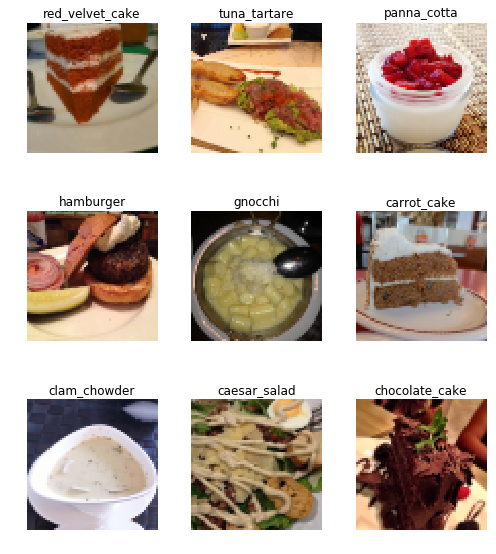

In [39]:
data.show_batch(rows=3, figsize=(7,8))

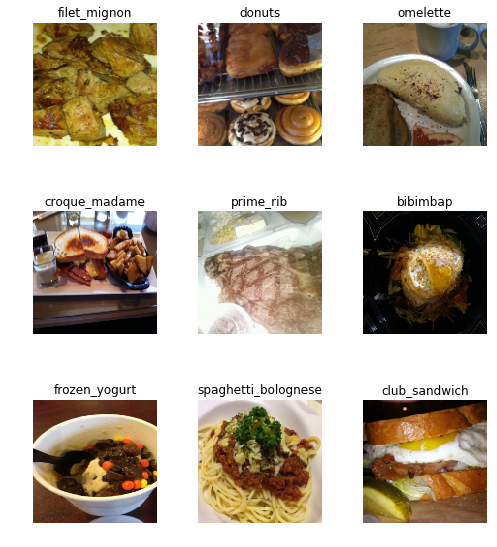

In [40]:
data2.show_batch(rows=3, figsize=(7,8))

In [41]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [53]:
learn2 = create_cnn(data2, models.resnet34, metrics=error_rate)

In [24]:
learn.fit_one_cycle(1, max_lr = 0.05)

epoch,train_loss,valid_loss,error_rate
1,3.660194,3.522694,0.809752


In [54]:
learn2.fit_one_cycle(4, max_lr=0.05)

epoch,train_loss,valid_loss,error_rate
1,3.950656,4.920678,0.916832
2,4.089389,3.925025,0.836238
3,3.260976,3.099517,0.701980
4,2.673423,2.498840,0.619406


In [55]:
learn2.save('stage-1')

In [56]:
learn2.unfreeze()

In [57]:
learn2.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 8.32E-06


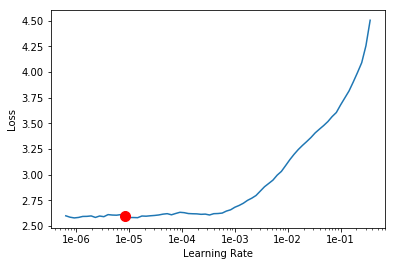

In [58]:
learn2.recorder.plot()

In [59]:
learn2.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate
1,2.611030,2.475249,0.618812
2,2.607012,2.559989,0.619802


In [61]:
learn2.save('stage-2')

In [64]:
learn2.load('stage-2');

In [65]:
interp = ClassificationInterpretation.from_learner(learn2)

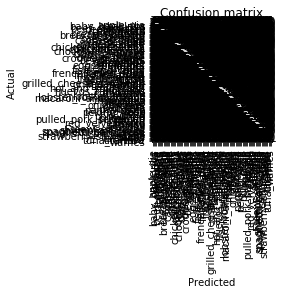

In [66]:
interp.plot_confusion_matrix()

In [67]:
from fastai.widgets import *

In [68]:
ds, idxs = DatasetFormatter().from_toplosses(learn2, ds_type=DatasetType.Valid)

In [74]:
ImageCleaner(ds, idxs, path=path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [75]:
learn2.unfreeze()

In [76]:
learn2.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate
1,2.610515,2.605225,0.623366
2,2.618247,2.462989,0.619406
